# Lab | Matplotlib & Seaborn

#### Import all the libraries that are necessary.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Challenge 3

#### Open the titanic file. Name your dataset titanic.

In [2]:
# Read the data
titanic = pd.read_csv('data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [3]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
Hint: Use Pandas select_dtypes

In [4]:
# Numerical variables
titanic.select_dtypes(exclude=object).dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [5]:
# Categorical variables
titanic.select_dtypes(exclude=['int','float']).dtypes

PassengerId     int64
Pclass          int64
Name           object
Gender         object
SibSp           int64
Parch           int64
Ticket         object
Cabin          object
Embarked       object
dtype: object

#### Set the plot style to classic and the figure size to (12,6).
Hint: To set the style you can use matplotlib.pyplot functions or seaborn 

In [6]:
# Plot style change
plt.style.use('classic')   # matplotlib
sns.set_style('whitegrid') # seaborn

# Figure size change
plt.rcParams['figure.figsize'] = (12, 6)

#### Use the right visulalization to show the distribution of the column Age.

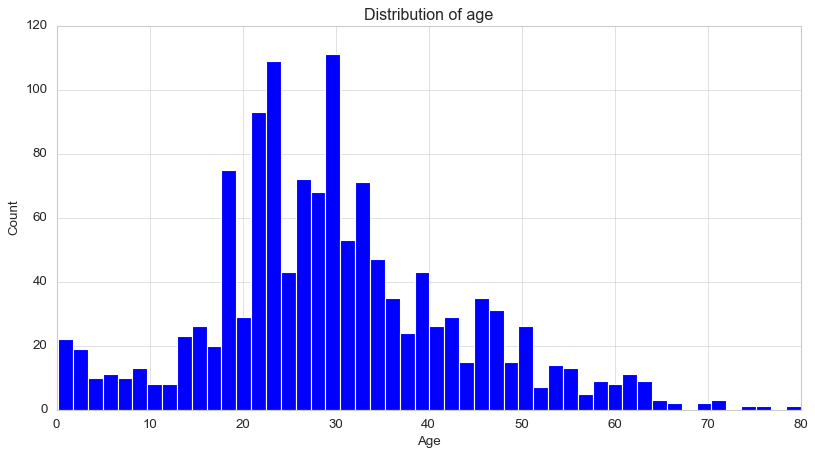

In [7]:
# Pandas plots are based on matplotlib

# Plot the histogram of column Age
titanic['Age'].hist(bins=50)

# Set titles, labels, etc
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
plt.show()

#### Use subplots and plot the distribution of the Age variable with bins equal to 10, 20 and 50.

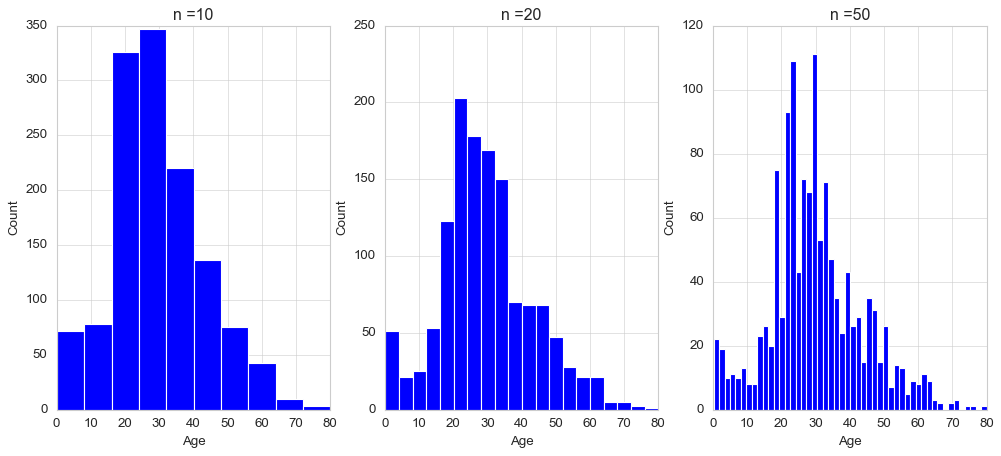

In [8]:
# Variables
bins = [10, 20, 50]

# Create a figure of a fixed size and axes
f, ax = plt.subplots(1,3)
f.set_figwidth(15)

# Plot the histogram using a different number of bins
for i in range(3):
    plt.sca(ax[i])
    titanic['Age'].hist(bins=bins[i])
    plt.title('n =' + str(bins[i]))
    plt.xlabel('Age')
    plt.ylabel('Count')

#### How does the bin size affect your plot? Comment.

~~~~
Using a low number of bins (wider bins) reduces noise on the distribution estimation while using a 
high number of bins (narrower bins) gives greater precision to the distribution estimation (and more noise). 
~~~~

#### Use seaborn to show the distribution of the column Age.

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


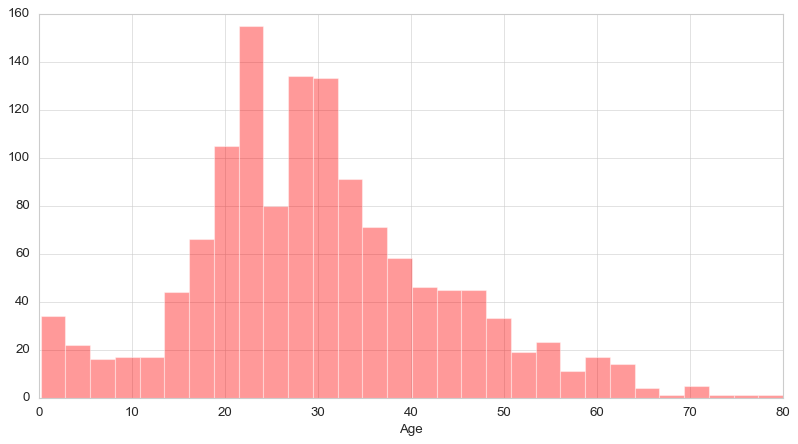

In [9]:
# Seaborn is a Python library based on matplotlib

# Plot of the age histogram using seaborn
sns.distplot(titanic['Age'], bins = 30, kde = False, color = 'red')

# Show the plot
plt.show()

#### Use the right plot to visualize the column Gender. There are 2 ways of doing it. Do it both ways.
Hint: Use matplotlib and seaborn

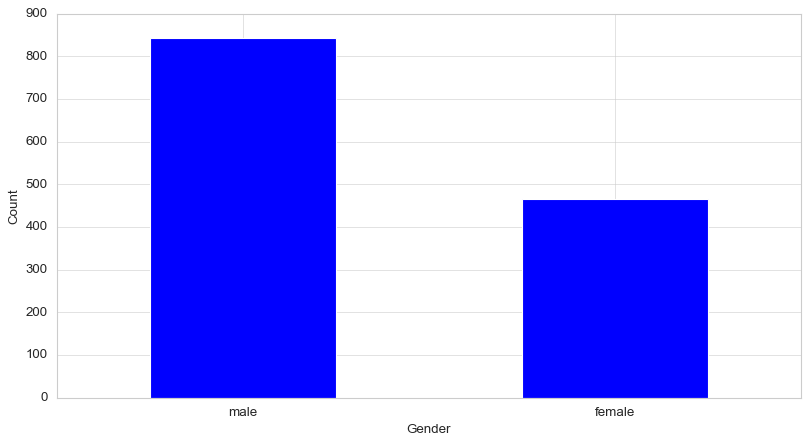

In [10]:
# OPTION 1 - Matplotlib

# Bar plot of the gender
titanic['Gender'].value_counts().plot(kind='bar')

# Add labels to the plot and change xticks rotation
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation = 0)

# Show the plot
plt.show()

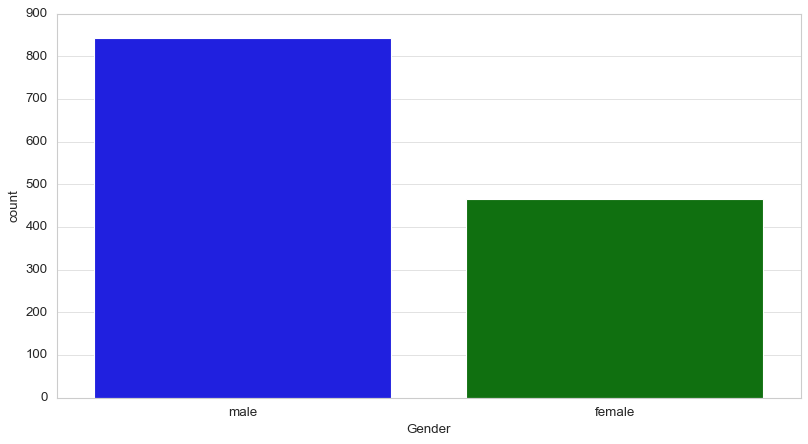

In [11]:
# OPTION 2 - Seaborn

# Seaborn Countplot
sns.countplot(x ='Gender', data = titanic)

# Show the plot
plt.show()

#### Use the right plot to visualize the column Pclass.

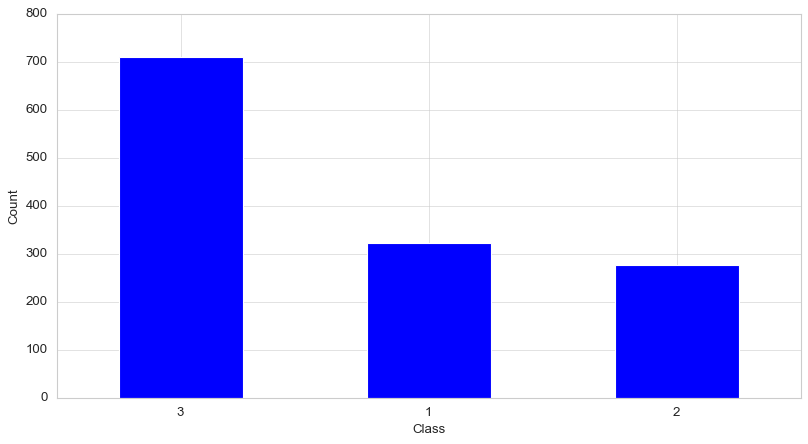

In [12]:
# Bar plot of Pclass
titanic['Pclass'].value_counts().plot(kind='bar')

# Add labels to the plot and change xticks rotation
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation = 0)

# Show the plot
plt.show()

#### We would like to have in one single plot the summary statistics of the feature Age. What kind of plot would you use?

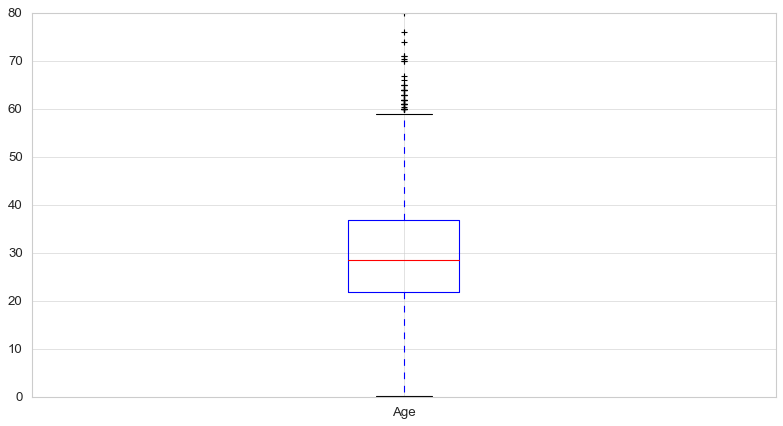

In [13]:
# Box plot
titanic.boxplot(column='Age')

# Show the plot
plt.show()

#### What does the last plot tells you about the feature Age? Comment.

~~~~
The statistics that you can get from the boxplot are the minimum, first quartile, median, 
third quartile, and maximum.

The red line shows us the median of Age. 
The blue box shows us the interquartile range (from Q1 to Q3).
It also shows us the outliers, which are out of the maximum and minimum range (Q1 - 1.5*IQR, Q3 + 1.5*IQR).
~~~~

#### Now in addition to the summary statistics, we want to have in the SAME plot the distribution of Age. What kind of plot would you use?

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


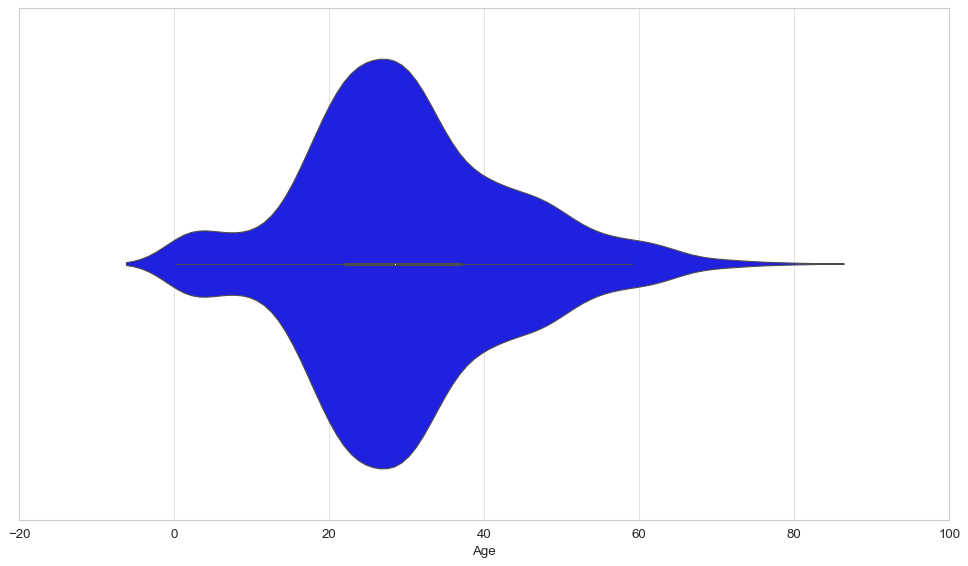

In [14]:
# Set figure size
plt.figure(figsize = (15,8))

# Violin plot
sns.violinplot("Age", data = titanic)

# Show the plot
plt.show()

#### What additional information the last plot provides you about the feature Age? Comment.

~~~~
This plot is a combination of a boxplot and a density plot. The violin plot features a kernel density estimation 
of the underlying distribution of the data.

The black central part of the plot is the same as a boxplot and the white dot is the median.
The blue part is the distribution of the data.
~~~~

#### We suspect that there is a linear relationship between Fare and Age. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
Hint: One of the ways involves using Seaborn.

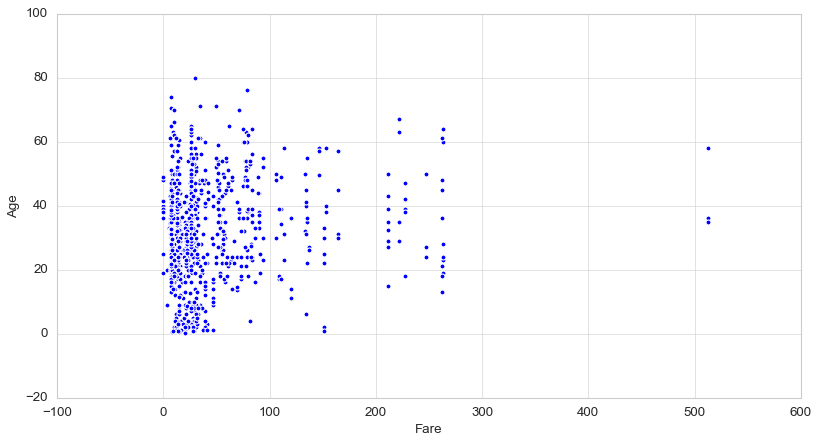

In [15]:
# OPTION 1

# Scatter plot
plt.scatter(titanic['Fare'], titanic['Age'])

# Add labels
plt.xlabel('Fare')
plt.ylabel('Age')

# Show the plot
plt.show()

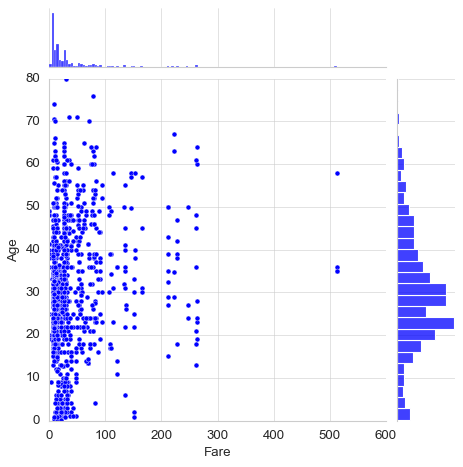

In [16]:
# OPTION 2

# Joinplot
sns.jointplot(x = 'Fare', y = 'Age', data = titanic)

# Show the plot
plt.show()

#### Using Seaborn plot the correlation matrix.

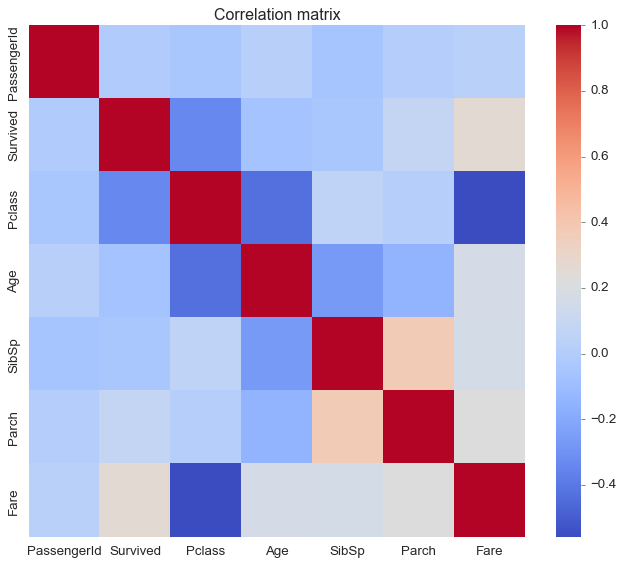

In [17]:
# Set figure size
plt.figure(figsize = (10,8))

# Correlation matrix
sns.heatmap(titanic.corr(), cmap='coolwarm')

# Add title
plt.title('Correlation matrix')

# Show plot
plt.show()

#### What are the most correlated features? Comment.

~~~~~
The most correlated features are Parch and SibSp.
~~~~~

#### Use the right plot to display the summary statistics of the Age in function of the Pclass.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

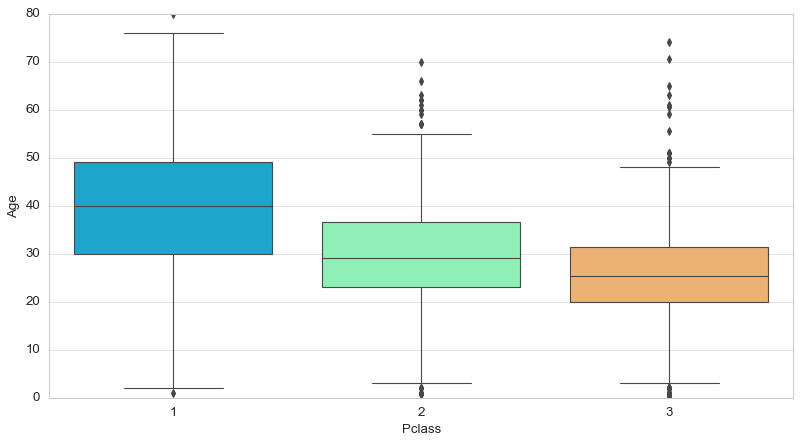

In [18]:
# Boxplot
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='rainbow')
    

#### Use the seaborn to plot the distribution of the Age based on the Gender.
Hint: Use Facetgrid

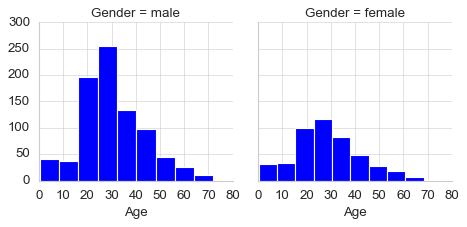

In [19]:
# Create a grid with FacetGrid
g = sns.FacetGrid(data = titanic, col = 'Gender')

# Draw a plot on each facet
g.map(plt.hist, 'Age')

# Show the plot
plt.show()